# [Practical AI with Python and Reinforcement Learning](https://www.udemy.com/course/practical-ai-with-python-and-reinforcement-learning)

* Section 7 - ***Artificial Neural Network and TensorFlow Basics***
  * Classification



# Keras TF 2.0 - Code Along Classification Project

Let's explore a classification task with Keras API for TF 2.0

## The Data

### Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and
     prognosis via linear programming. Operations Research, 43(4), pages 570-577,
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994)
     163-171.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/drive/MyDrive/ml-dataset/data/cancer_classification.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


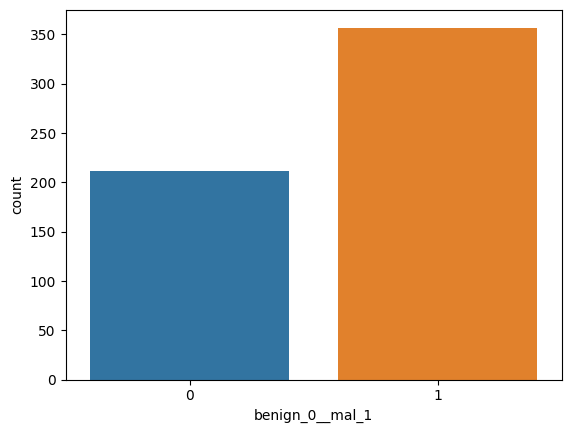

In [ ]:
# The data is not too unbalanced
sns.countplot(data=df, x="benign_0__mal_1")
plt.show()

<Axes: >

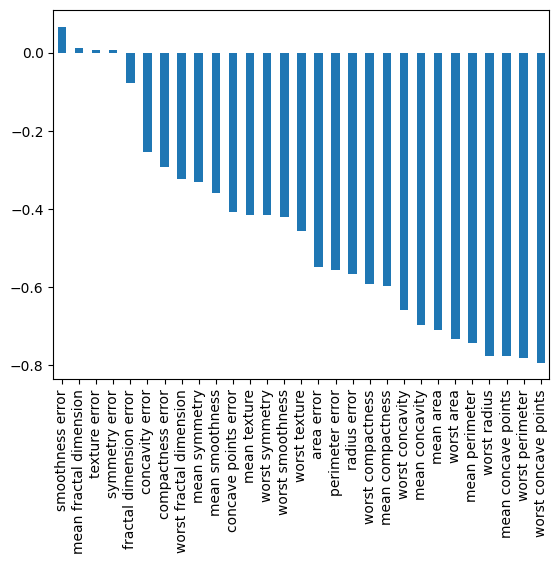

In [ ]:
# Remove the benign_0__mal_1, because it's correlate with itsef
(df.corr()["benign_0__mal_1"][1:-1]
   .sort_values(ascending=False)
   .plot(kind="bar"))

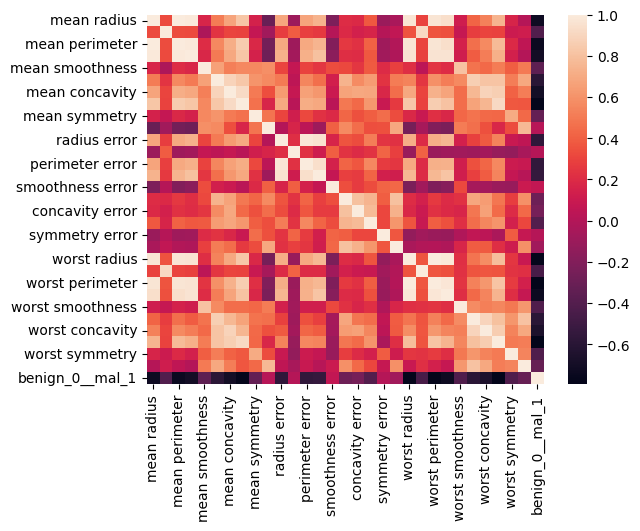

In [3]:
sns.heatmap(df.corr())
plt.show()

In [4]:
X = df.drop("benign_0__mal_1", axis=1).values
y = df["benign_0__mal_1"].values

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Avoiding overfit

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [8]:
model = Sequential()
model.add(Dense(30, activation="relu"))
model.add(Dense(15, activation="relu"))
# Binary classification [0, 1]
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam")

In [9]:
model.fit(x=X_train, y=y_train,
          validation_data=(X_test, y_test),
          epochs=600, use_multiprocessing=True)

Epoch 1/600
14/14 [==============================] - 2s 28ms/step - loss: 0.6839 - val_loss: 0.6620
Epoch 2/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6423 - val_loss: 0.6227
Epoch 3/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6027 - val_loss: 0.5825
Epoch 4/600
14/14 [==============================] - 0s 9ms/step - loss: 0.5590 - val_loss: 0.5337
Epoch 5/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5085 - val_loss: 0.4761
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4543 - val_loss: 0.4201
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4014 - val_loss: 0.3672
Epoch 8/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3590 - val_loss: 0.3270
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3190 - val_loss: 0.2895
Epoch 10/600
14/14 [==============================] - 0s 7ms/step - loss: 0.2898 - val_loss: 0.2605
Epoch 11

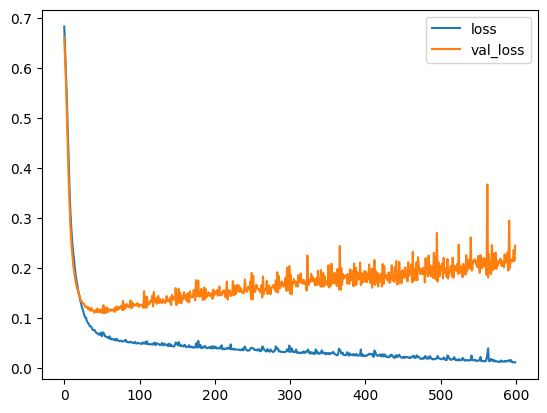

In [10]:
# In this example, the data overfitted
df_loss = pd.DataFrame(model.history.history)
df_loss.plot()
plt.show()

In [11]:
model = Sequential()
model.add(Dense(30, activation="relu"))
model.add(Dense(15, activation="relu"))
# Binary classification [0, 1]
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam")

### EarlyStopping configuration

- Mode **min**: When you want to minimize some value, for example, the loss, so you stop early.
- Mode **max**: When you want to maximize some value, for example, the accuracy, so if the increase has stopped, early stopping will happen.

In [12]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", mode="min",
                           verbose=1, patience=25)
model.fit(x=X_train, y=y_train,
          validation_data=(X_test, y_test),
          epochs=600, callbacks=[early_stop],
          use_multiprocessing=True, verbose=1)

Epoch 1/600
14/14 [==============================] - 1s 17ms/step - loss: 0.6622 - val_loss: 0.6460
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6250 - val_loss: 0.6058
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5817 - val_loss: 0.5606
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5419 - val_loss: 0.5150
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4961 - val_loss: 0.4718
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4539 - val_loss: 0.4257
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4101 - val_loss: 0.3833
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3703 - val_loss: 0.3430
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3333 - val_loss: 0.3076
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3047 - val_loss: 0.2782
Epoch 11

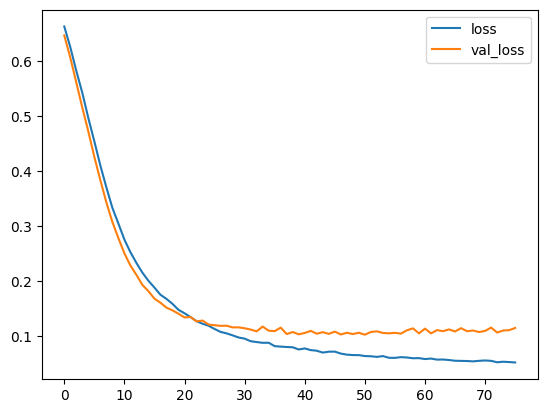

In [13]:
# Stopped in 76 epochs, the overfit was prevented
df_loss = pd.DataFrame(model.history.history)
df_loss.plot()
plt.show()

### Avoid overfit with Drop-out

The drop-out technique "disables" (set activation to zero) randomly in the training session some neurons, so we it's resemble that we're training on a smaller networks at each iteration, smaller neural networks tend not to overfit with a lot of data. Another benefits of drop-out is:

- The neurons became less dependent between another neurons, because it memorized different information on each iteration than it's other counter parts.
- It introduces noises, so it's harder to memorized too specific things.

In [14]:
model = Sequential()
model.add(Dense(30, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(15, activation="relu"))
model.add(Dropout(0.5))
# Binary classification [0, 1]
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam")

In [15]:
early_stop = EarlyStopping(monitor="val_loss", mode="min",
                           verbose=1, patience=25)
model.fit(x=X_train, y=y_train,
          validation_data=(X_test, y_test),
          epochs=600, callbacks=[early_stop],
          use_multiprocessing=True, verbose=1)

Epoch 1/600
14/14 [==============================] - 1s 15ms/step - loss: 0.7244 - val_loss: 0.6983
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.7031 - val_loss: 0.6806
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6620 - val_loss: 0.6578
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6347 - val_loss: 0.6200
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6190 - val_loss: 0.5861
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5950 - val_loss: 0.5503
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5870 - val_loss: 0.5106
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5466 - val_loss: 0.4775
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5173 - val_loss: 0.4467
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5184 - val_loss: 0.4232
Epoch 11

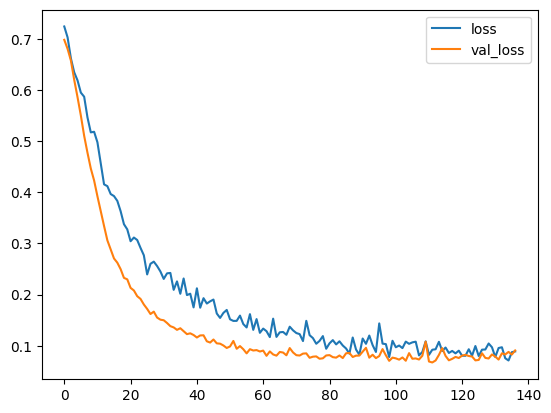

In [16]:
# Now the model learned much more when the drop-out (+ early stopping) was used
df_loss = pd.DataFrame(model.history.history)
df_loss.plot()
plt.show()

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = (model.predict(X_test) > 0.5).astype("int32")
print("classification_report:")
print(classification_report(y_test, predictions))
print("confusion_matrix:")
print(confusion_matrix(y_test, predictions))

5/5 [==============================] - 0s 3ms/step
classification_report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

confusion_matrix:
[[54  1]
 [ 3 85]]
